In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read csv file convert into dataframe 
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
data.shape

(16468, 14)

datashape tells we have total 16468 columns and 14 rows

In [4]:
sum(data.duplicated())

14950

there 14590 duplicate values are prersent

In [5]:
daf = data.drop_duplicates()

In [6]:
#check the number of missing values in each column in a df
daf

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.0,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.0,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.0,conventional,2016.0,Charlotte
1516,14.0,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.0,conventional,2016.0,Charlotte


In [7]:
df = daf.dropna()
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [8]:
sum(df.duplicated())

0

there are no duplicate values are present

In [9]:
#check the number of missing values in each column in a dataset
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

there are no null values are present

<AxesSubplot:>

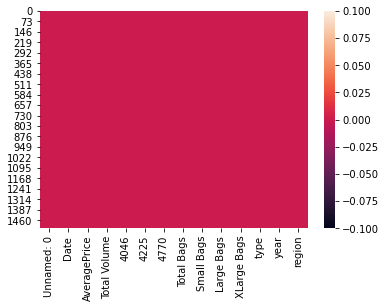

In [10]:
#to check null values with heatmap also
sns.heatmap(df.isnull())

In [11]:
#find some more information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


hera data information gives Date, region, type are object type while year is int64. All the other columns are of float64 data type.and data shape is total 1517 rows and 14 clomns and also tells no null values 

In [12]:
df.nunique()

Unnamed: 0        52
Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

here in df only 1 unique value for type column so we droped that column from the dataset.

In [13]:
df.drop('type', axis = 1, inplace = True)

In [14]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany


# EDA

In [40]:
import warnings 
warnings.filterwarnings('ignore')

In [41]:
df['Month'] = df['Date'].apply(lambda x: x[3:5])
df['Month'] = df['Month'].astype(float)
df['Month']

0       12.0
1       12.0
2       12.0
3       12.0
4       11.0
        ... 
1512    10.0
1513    10.0
1514    10.0
1515     9.0
1516     9.0
Name: Month, Length: 1517, dtype: float64

In [42]:
df.drop('Date',axis = 1, inplace = True)

In [43]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [44]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,12.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11.0


In [45]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.166777
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.391243
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000


In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [47]:
df['region'] = encoder.fit_transform(df['region'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,12.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,12.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,12.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,11.0


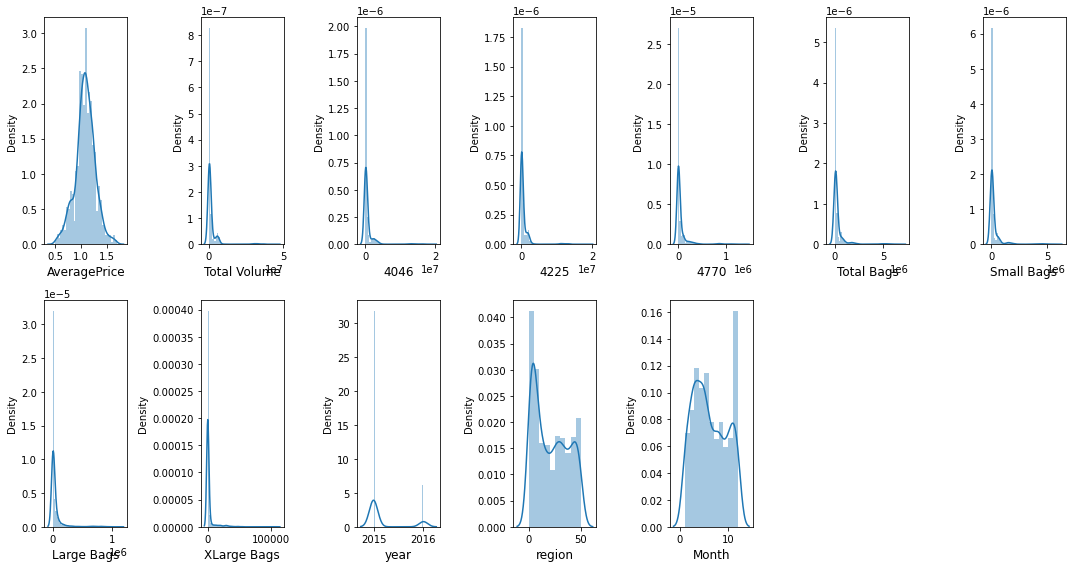

In [48]:
#how data distributed every column by visualization
plt.figure(figsize = (15,8))
plotnumber = 1

for column in df:
    if plotnumber<=14:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 12)
               
    plotnumber+=1
plt.tight_layout()


Average sales has the perfect bell shaped graph, while other graphs are more centered towards 0 and shows right tail skewness.

year,region and month are categorical values it will visualise with hist plot

In [49]:
cat_cols = ['year', 'region', 'Month']

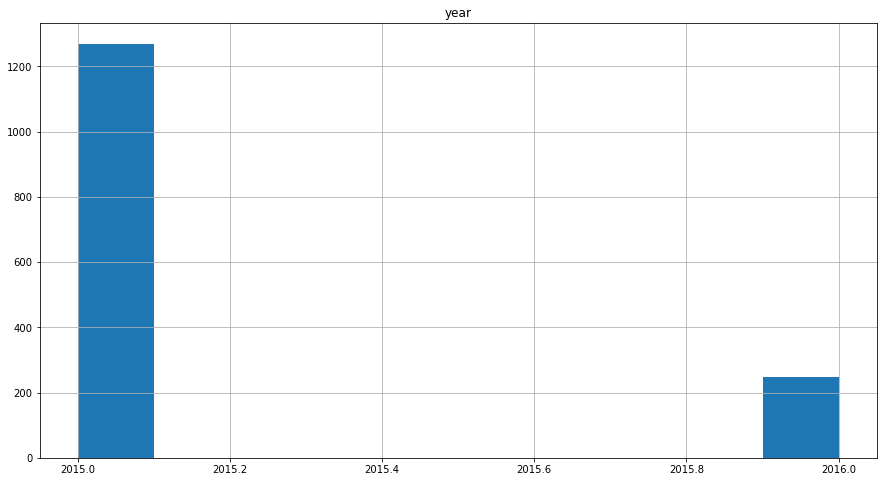

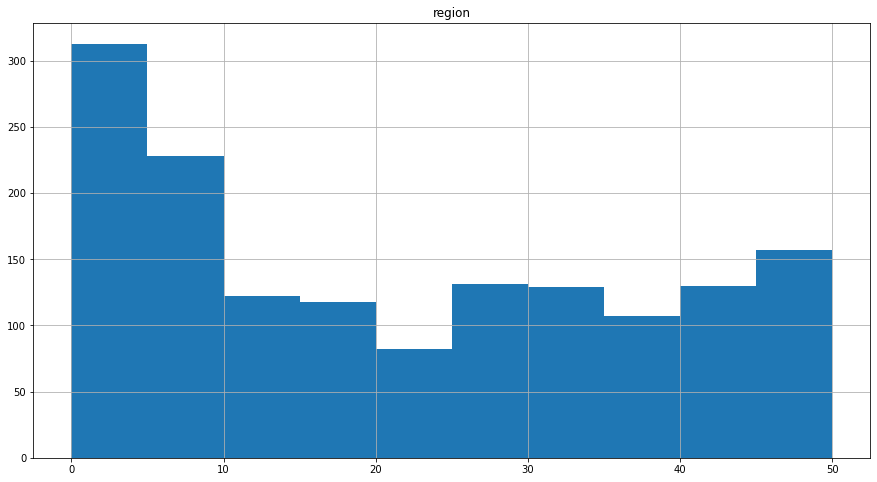

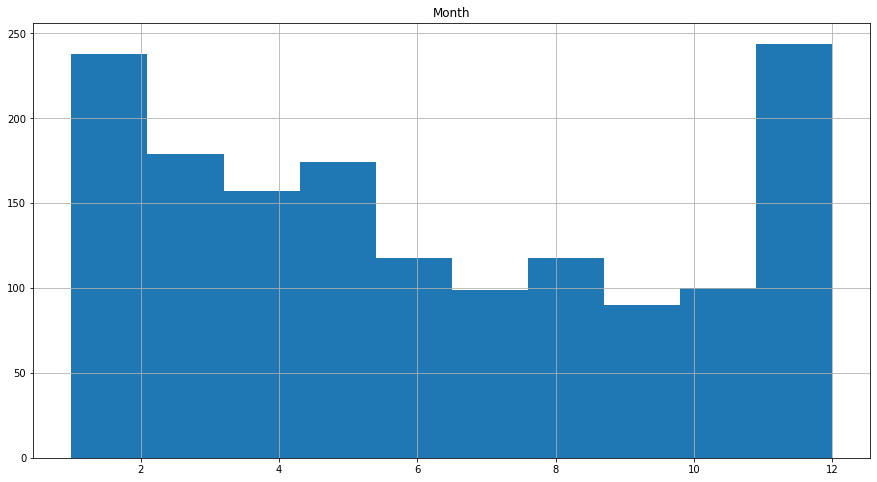

In [50]:
for i in cat_cols:
    plt.figure(figsize = (15, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

Most of the data is taken in 2015 and is acquiered in the month of December and January.

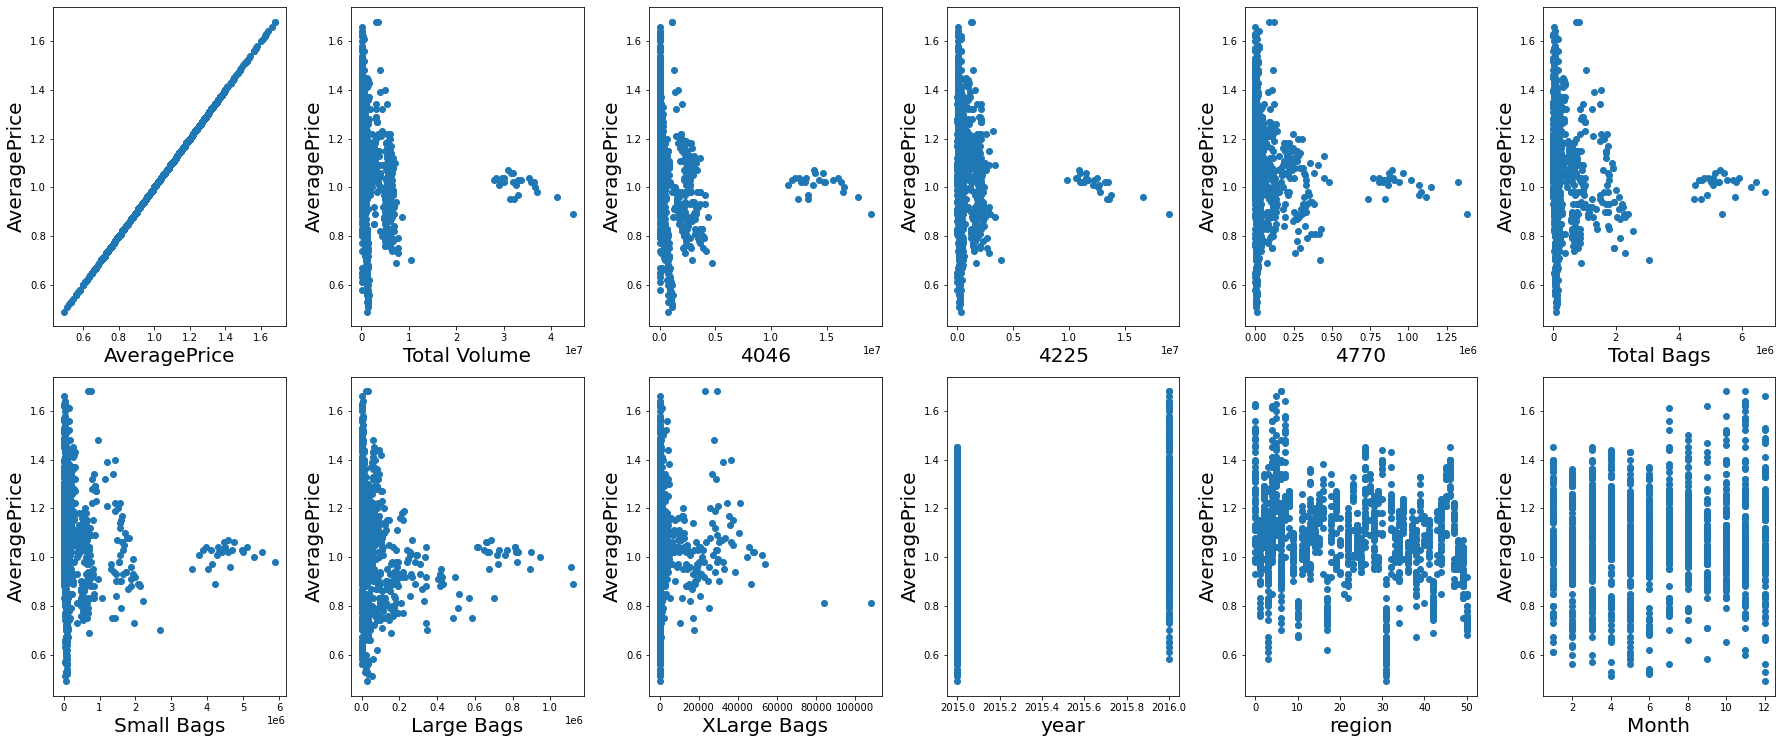

In [51]:
#visulizing relationship
plt.figure(figsize = (25,15))
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(3,6,plotnumber)
        plt.scatter(df[column],df['AveragePrice'])
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('AveragePrice',fontsize = 20)
               
    plotnumber+=1
plt.tight_layout()

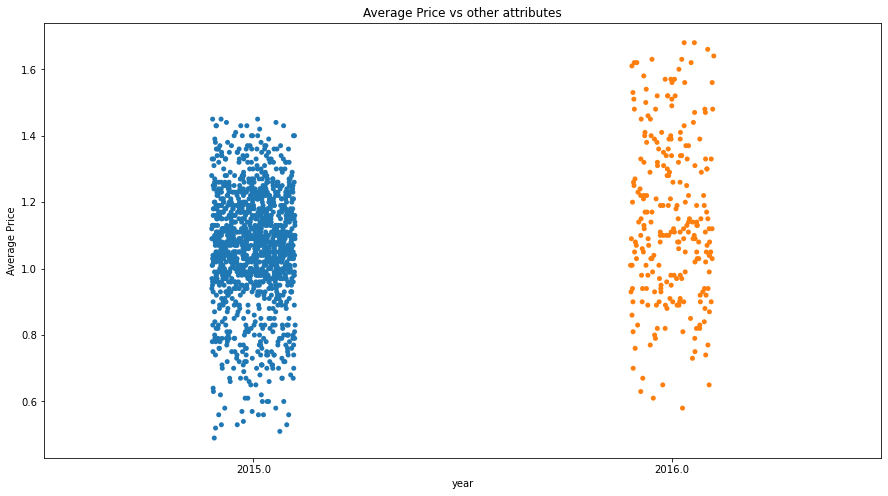

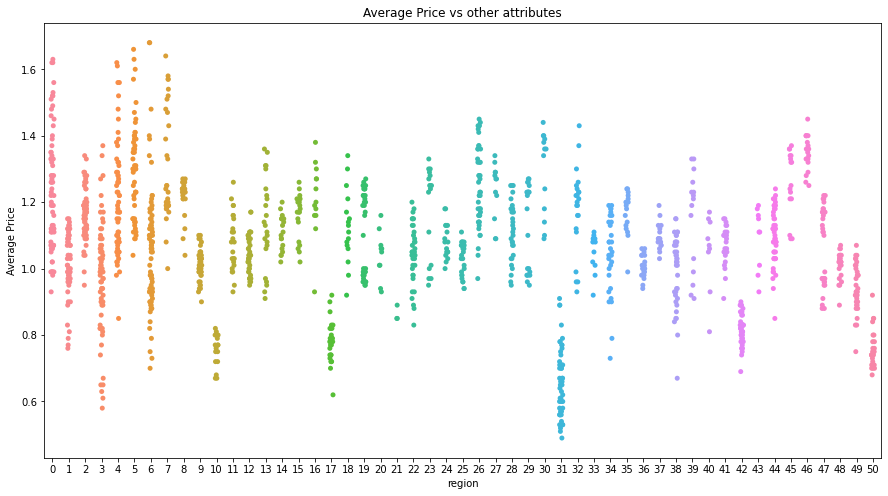

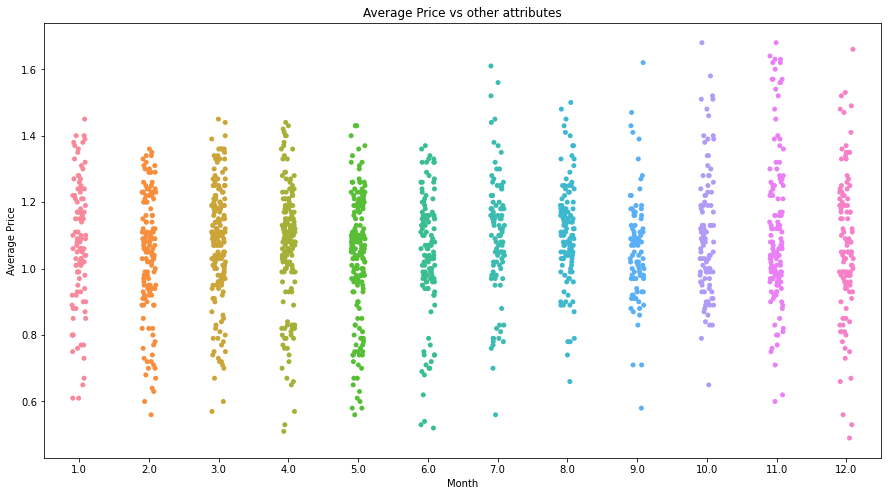

In [233]:
for i in cat_cols:                                        
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df[i], df['AveragePrice'])
    ax.set(xlabel = i, ylabel = 'Average Price')
    plt.title('Average Price vs other attributes')
    plt.show()

Prices seems to be highest in the month of November and prices have high range in the month of December.

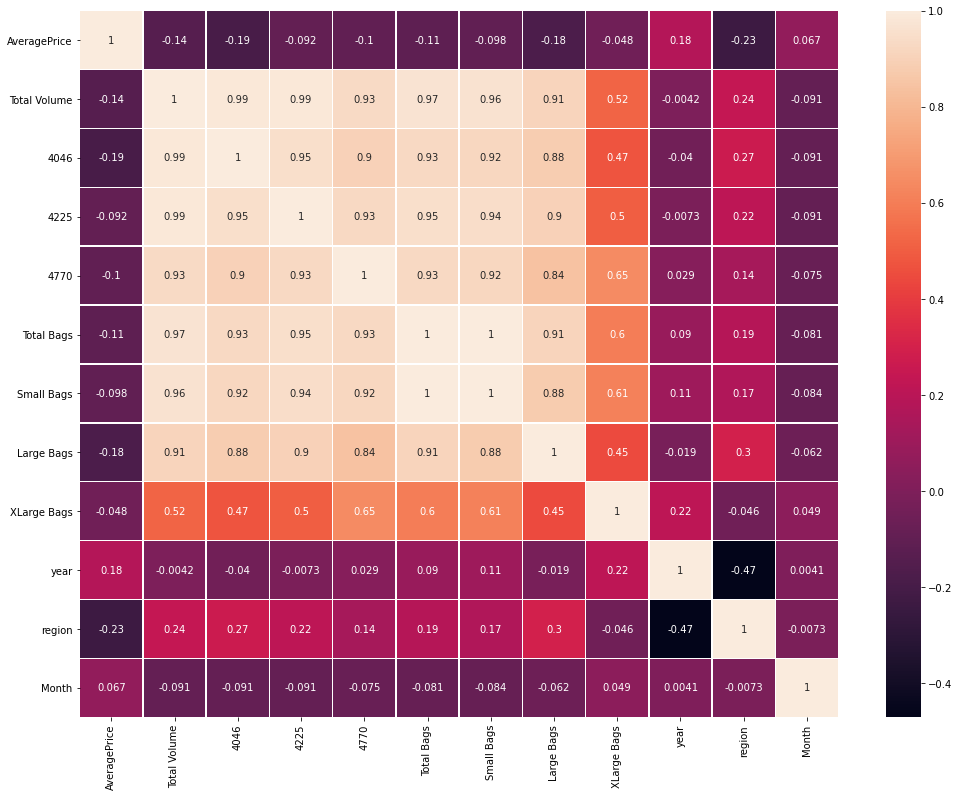

In [234]:
#heat map
fig, ax = plt.subplots(figsize=(17,13))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

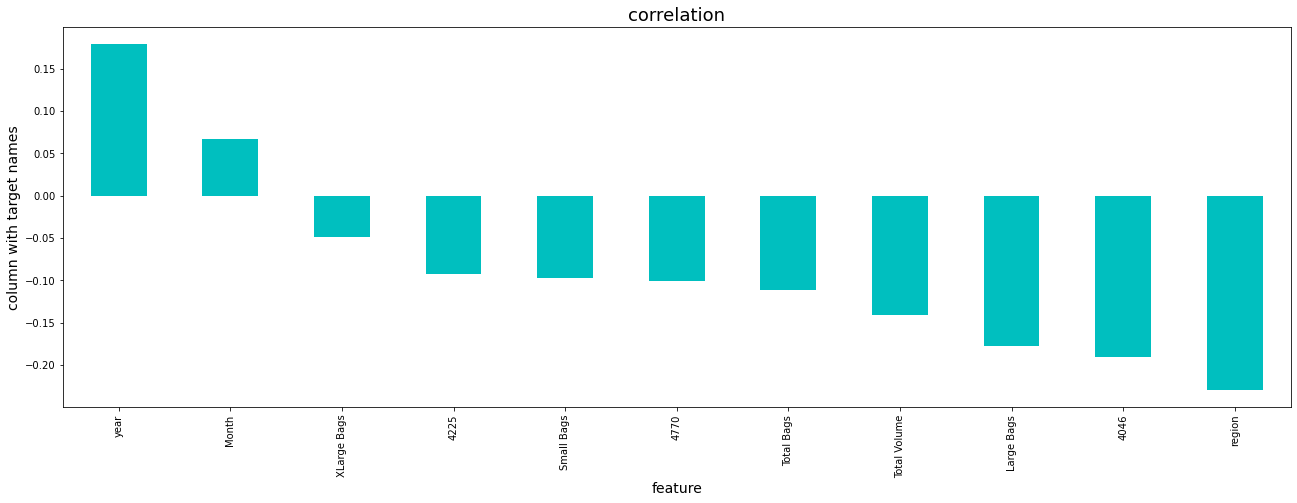

In [235]:
#visualize correlation 
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show


Most of the columns have negative correlation with Average Price.

4046 seems to have highest correlation with Average Price at -0.19 followed by large bags at -0.18.

Total volume, 4046, 4225, 4770, Total bags, small bags and large bags all have high correlation amongst them as seen in the heatmap.

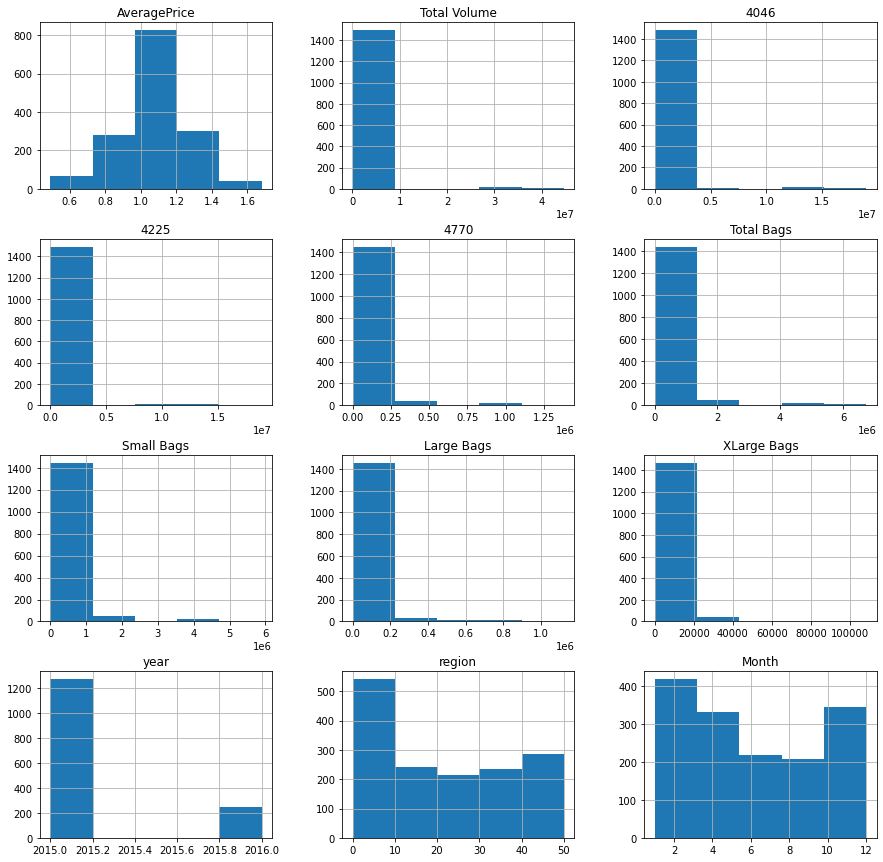

In [236]:
df.hist(bins=5, figsize=(15,15));

almost columns are data right side skew

# finding outliers

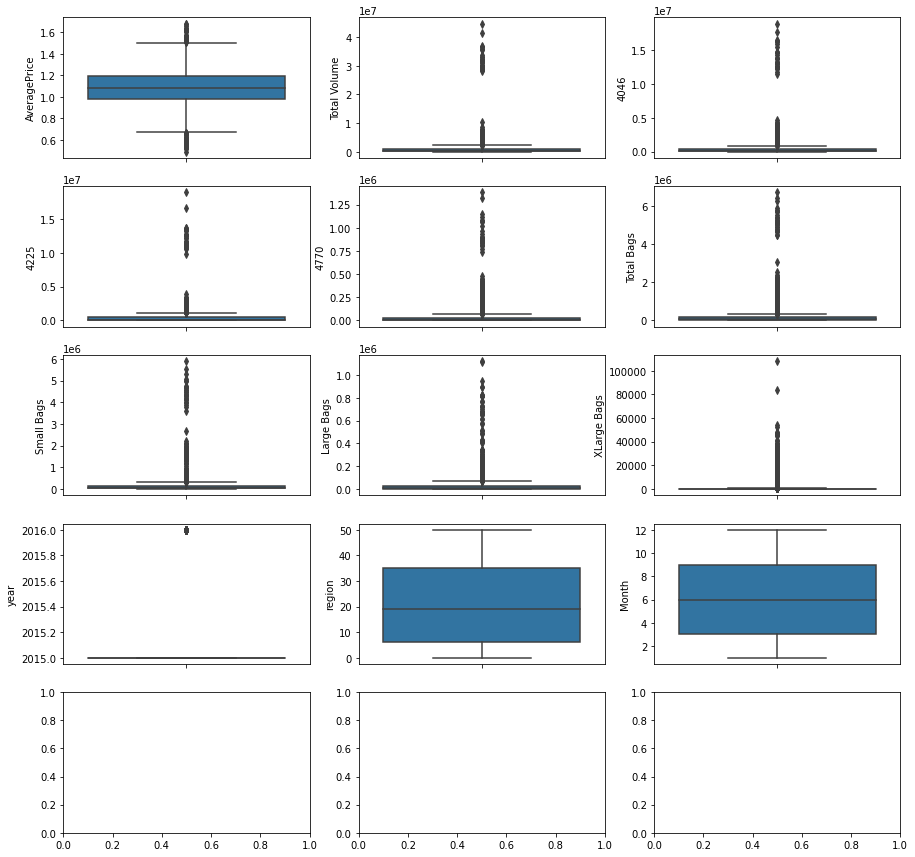

In [52]:
#create the box plot
fig,ax = plt.subplots(ncols=3,nrows=5,figsize=(15,15))
index=0
ax = ax.flatten()

for col, value in df.items():
    if col !='type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index+= 1

In [53]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Month           0.233418
dtype: float64

In [54]:
from scipy.stats import zscore
z = np.abs(zscore (df))
z

array([[1.35048079, 0.34696593, 0.33149016, ..., 0.44100815, 1.3143384 ,
        1.72065124],
       [1.45639674, 0.34907791, 0.33167633, ..., 0.44100815, 1.3143384 ,
        1.72065124],
       [0.76783831, 0.33478463, 0.33161448, ..., 0.44100815, 1.3143384 ,
        1.72065124],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ..., 2.26753179, 0.88028586,
        1.13070256],
       [2.09189247, 0.31878364, 0.30423037, ..., 2.26753179, 0.88028586,
        0.83572822],
       [1.88006056, 0.3201721 , 0.30987728, ..., 2.26753179, 0.88028586,
        0.83572822]])

In [55]:
threshold = 3
print (np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [56]:
df_new = df [(z<3).all(axis = 1)]

In [57]:
df_new.shape

(1436, 12)

All rows having z-score of more than 2 were dropped from the data.

78 rows dropped from the dataset.

# perform EDA is the best possible way using pandas profile

In [15]:
# we can also to create the simple report of EDA quikly and easily
profile = ProfileReport(df,title = 'Pandas Profile Report',explorative = True)

In [16]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

wow perform EDA is the best possible way using pandas profile and it will show all the eda in one table format correlation visulize with heatmap and variables,missing values,linear relationship etc it will show in a minutes



# checking for Skewness

In [58]:
df_new.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
Month           0.247180
dtype: float64

In [59]:
from sklearn.preprocessing import power_transform 
df_New=power_transform(df_new)
df_New=pd.DataFrame(df_New,columns=df_new.columns)

In [60]:
df_New.skew()

AveragePrice    0.019378
Total Volume    0.000000
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
year            2.004439
region         -0.219708
Month          -0.095103
dtype: float64

In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X= pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)

In [262]:
X.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.344989,-0.563692,-0.476055,-0.537420,-0.486320,-0.538421,-0.523070,-0.481439,-0.299919,-0.41387,-1.322817,1.742230
1,1.451388,-0.569945,-0.476535,-0.554838,-0.486147,-0.535571,-0.519785,-0.481353,-0.299919,-0.41387,-1.322817,1.742230
2,-0.782987,-0.527627,-0.476376,-0.440368,-0.484925,-0.540364,-0.525362,-0.481239,-0.299919,-0.41387,-1.322817,1.742230
3,0.015004,-0.553834,-0.475929,-0.506329,-0.485906,-0.548589,-0.535018,-0.480620,-0.299919,-0.41387,-1.322817,1.742230
4,1.078992,-0.572509,-0.476181,-0.556258,-0.485852,-0.547275,-0.533757,-0.479328,-0.299919,-0.41387,-1.322817,1.445908


In [263]:
#split the data , seperate features and label
x = X.drop('AveragePrice', axis = 1)
y = X['AveragePrice']

In [264]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,-0.563692,-0.476055,-0.537420,-0.486320,-0.538421,-0.523070,-0.481439,-0.299919,-0.41387,-1.322817,1.742230
1,-0.569945,-0.476535,-0.554838,-0.486147,-0.535571,-0.519785,-0.481353,-0.299919,-0.41387,-1.322817,1.742230
2,-0.527627,-0.476376,-0.440368,-0.484925,-0.540364,-0.525362,-0.481239,-0.299919,-0.41387,-1.322817,1.742230
3,-0.553834,-0.475929,-0.506329,-0.485906,-0.548589,-0.535018,-0.480620,-0.299919,-0.41387,-1.322817,1.742230
4,-0.572509,-0.476181,-0.556258,-0.485852,-0.547275,-0.533757,-0.479328,-0.299919,-0.41387,-1.322817,1.445908


In [265]:
y

0       1.344989
1       1.451388
2      -0.782987
3       0.015004
4       1.078992
          ...   
1431    1.664186
1432    2.302579
1433    2.142980
1434    2.089781
1435    1.876983
Name: AveragePrice, Length: 1436, dtype: float64

# Model Building

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [267]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 75)

In [268]:
lm = LinearRegression()
kn = KNeighborsRegressor()
ab = AdaBoostRegressor()
lr = Lasso()
ri = Ridge()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [269]:
models = LinearRegression(),Ridge(),Lasso(), RandomForestRegressor(),XGBRegressor(), KNeighborsRegressor(),AdaBoostRegressor()

In [270]:
#coefficient matrix
#MAE MSE RMSE Using with metrics 
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

In [271]:
for i in models:
    create_model(i)

LinearRegression()
Mean absolute error 0.7091339368647277
Mean squared error 0.8527073626662578
Root Mean squared error 0.9234215519827647
R2 Score 0.22618604965709566
---------------------------------------------------------------------------------------------------------
Ridge()
Mean absolute error 0.7090938767615411
Mean squared error 0.852750543611297
Root Mean squared error 0.923444932636103
R2 Score 0.22614686386004124
---------------------------------------------------------------------------------------------------------
Lasso()
Mean absolute error 0.8062285363650087
Mean squared error 1.1179251442863825
Root Mean squared error 1.0573197928187963
R2 Score -0.014493494442226584
---------------------------------------------------------------------------------------------------------
RandomForestRegressor()
Mean absolute error 0.32646908516391093
Mean squared error 0.2041054140467915
Root Mean squared error 0.4517802718654186
R2 Score 0.814778640780028
----------------------------

# Cross Validation

do cross validation for every model

In [272]:
print(cross_val_score(lr,x,y,cv=5).mean())

-0.07510412809571658


In [273]:
print(cross_val_score(kn,x,y,cv=5).mean())

-0.18525994826688294


In [274]:
print(cross_val_score(lm,x,y,cv=5).mean())

-0.47451655596285525


In [275]:
print(cross_val_score(ab,x,y,cv=5).mean())

0.23123798669025414


In [276]:
print(cross_val_score(xgb,x,y,cv=5).mean())

0.08257918326500484


In [277]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.14338788010144748


In [278]:
print(cross_val_score(ri,x,y,cv=5).mean())

-0.47037866787779636


In [279]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 0.3121828410114554
Minimum Mean squared error is shown by  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, mon

Difference between R2 score and cross validation score is least in xgb booster model, hence we'll work on that Model.

xgb booster gets 84% is good score than reaming models

now improve our score do with hyper parameter tuning

# Hyperparameter tuning

In [288]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
import warnings 
warnings.filterwarnings('ignore')

In [289]:
params = {
            'max_depth': range (2, 10, 1),
            'n_estimators': range(60, 220, 40),
            'learning_rate': [0.1, 0.01, 0.05]
}


In [290]:
model=XGBRegressor()

In [292]:
grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 3)

In [293]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [294]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 180}

In [300]:
xgb =XGBRegressor(learning_rate =  0.1,max_depth = 6,n_estimators = 180)
xgb.fit(x_train, y_train)
predict = xgb.predict(x_test)
print (r2_score(y_test, predict))
print (mean_squared_error(y_test, predict))
print (mean_absolute_error(y_test, predict))

0.8391553374061871
0.17724341617069164
0.308939091217044


In [301]:
print (r2_score(y_test, predict))

0.8391553374061871


In [296]:
print(cross_val_score(xgb,x,y,cv=5).mean())

0.1284377639296713


After hypertuning with GridSearchCV the difference between R2 score and cross validation score decreased, with increase in cross validation score.

The XGBoost library implements the gradient boosting decision tree algorithm. ... It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models. This approach supports both regression and classification predictive modeling problems.

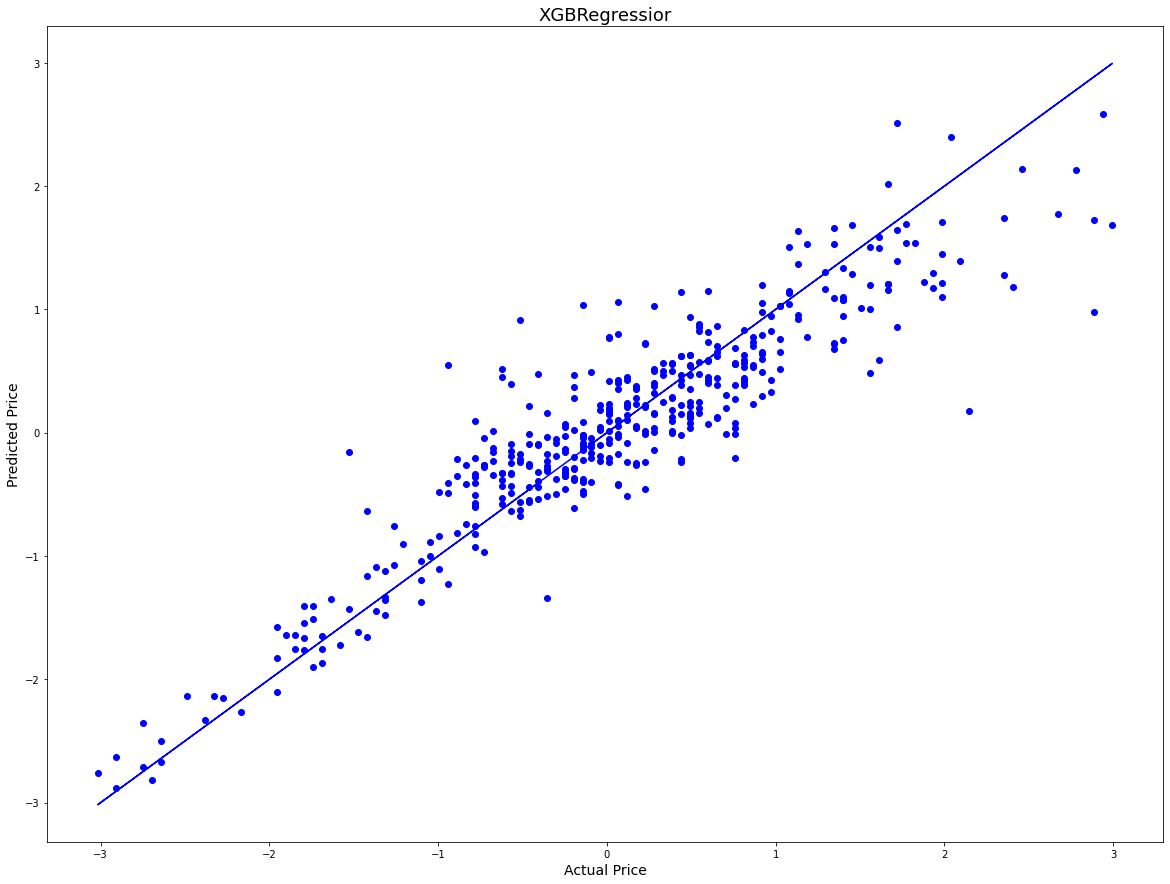

In [302]:
#plot predicted actual,predicted and model
plt.figure(figsize = (20, 15))
plt.scatter(x = y_test, y = predict, color = 'b')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Price', fontsize = 14)
plt.ylabel('Predicted Price', fontsize = 14)
plt.title('XGBRegressior', fontsize = 18)
plt.show()

# Saving Model

In [304]:
import joblib
joblib.dump(xgb,"Avacoda_dataset")

['Avacoda_dataset']